# Lineare Modelle

In dieser Übung werden wir die linearen Modelle, die in den Vorlesungsfolien vorkommen, selbst implementieren.
Wir starten mit den Iris-Daten, die Sie schon aus der Vorlesung kennen.

In [3]:
import pandas as pd

df = pd.read_csv("iris.csv", index_col=0)
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Wie in der Vorlesung können wir die Daten plotten.

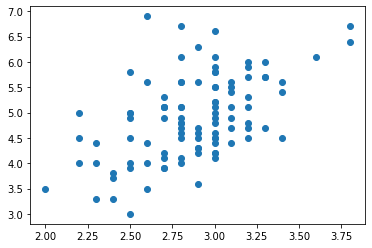

In [11]:
#plot iris 

import matplotlib.pyplot as plt

dfs = df.loc[df.Name != "Iris-setosa",:]

plt.plot(dfs.loc[:,"SepalWidth"],dfs.loc[:,"PetalLength"],'o')

Zunächst schauen wir uns das einfache lineare Modell an, das den Zusammenhang zwischen PetalLength und SepalWidth darstellt. Wir werden für das Fitten von linearen Modellen das Python-Paket statsmodels verwenden (`https://www.statsmodels.org`). Die Spezifikation von linearen Modellen funktioniert hier ganz ähnlich wie in den R-Beispielen, die in der Vorlesung vorkommen.

In [16]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('PetalLength ~ SepalWidth', data=dfs).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PetalLength   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     36.28
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           2.99e-08
Time:                        11:23:36   Log-Likelihood:                -106.48
No. Observations:                 100   AIC:                             217.0
Df Residuals:                      98   BIC:                             222.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2021      0.619      1.942      0.055      -0.026       2.430
SepalWidth     1.2897      0.214      6.023      0.000       0.865       1.715
==============================================================================
Omnibus:                        6.767   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.222
Skew:                           0.575   Prob(JB):                       0.0446
Kurtosis:                       3.414   Cond. No.                         28.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Aufgabe*: Interpretieren Sie die Ergebnisse! Was bedeuten die Koeffizienten, $R^2$, p-Werte?

## Regularisierung

Betrachten Sie nun den stark korrelierten Datensatz von Seite 44 der Folien.

In [21]:
df = pd.read_csv("corr_data.csv")
df

,x1,x2,y
0,-10.008379,-10.007781,-16.064194
1,-9.811091,-9.787912,-13.787926
2,-9.604869,-9.592039,-13.473252
3,-9.402045,-9.418639,-13.439822
4,-9.193054,-9.190633,-13.027876
...,...,...,...
96,9.191319,9.195451,23.276237
97,9.392459,9.377327,23.795605
98,9.586266,9.604799,25.196303
99,9.804099,9.800005,24.994132


*Aufgabe*: Fitten Sie ein lineares Modell mit y als abhängiger Variablen und x1 und x2 als unabhängigen Variablen. Interpretieren Sie erneut die Ergebnisse. Was ist das Problem?

*Aufgabe*: Verwenden Sie Ridge Regression, um ein lineares Modell zu fitten.

# Logistische Regression mit statsmodels

Schließlich wollen wir uns noch lineare Modelle als Klassifikatoren anschauen. Konkret wollen wir die Klasse (die Spalte `Name` im Data Frame) aus SepalWidth und PetalLength vorhersagen, indem wir ein lineares Modell mittels logistischer Regression fitten. 

*Aufgabe*: Erstellen Sie im Iris Data Frame eine neue Spalte `NameNum`, die 1 ist, falls Name=Iris-virginica, und 0 sonst. Führen sie dann regularisierte logistische Regression durch, wobei NameNum die abhängige Variable ist, und SepalWidth und PetalLength die abhängigen Variablen. Interpretieren Sie die Parameter. Was ist der Unterschied zwischen der Entscheidungsgrenze und der Regressionsgeraden?

# Logistische Regression mit sklearn

Im Machine Learning sind wir oft gar nicht so sehr an den Parametern des Modells interessiert, sondern daran, dass das Modell gute Vorhersagen liefert. Für solche Zwecke ist die logistische Regression aus dem Paket `sklearn` besser geeignet -- dort werden Dinge, die in statsmodels recht mühsam sind, wie das Encoding der Klasse, der Umgang mit mehr als zwei Klassen usw. direkt erledigt. Schauen Sie sich dafür die folgende Dokumentation an: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

*Aufgabe*: Teilen Sie den Iris-Datensatz in zwei Teilmengen auf: Eine Trainingsmenge, die 80% der Daten enthält, und eine Testmenge, die die restlichen 20% der Daten enthält. Trainieren Sie dann ein Logit-Modell mit den Trainingsdaten und erzeugen Sie eine Vorhersage für die Klasse der Testdaten. Welcher Anteil der Testdaten wurde korrekt klassifiziert?